In [273]:
import requests
import datetime as dt
from bs4 import BeautifulSoup 
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [274]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [275]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n

In [276]:
artists = BeautifulSoup(response.content, 'lxml')
print(artists.title.text)

Hall of Fame Members | Country Music Hall of Fame


In [277]:
print(names)

[<div class="vertical-card_content--title">
<h3>Roy Acuff</h3>
</div>, <div class="vertical-card_content--title">
<h3>Alabama</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bill Anderson</h3>
</div>, <div class="vertical-card_content--title">
<h3>Eddy Arnold</h3>
</div>, <div class="vertical-card_content--title">
<h3>Chet Atkins</h3>
</div>, <div class="vertical-card_content--title">
<h3>Gene Autry</h3>
</div>, <div class="vertical-card_content--title">
<h3>DeFord Bailey</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bobby Bare</h3>
</div>, <div class="vertical-card_content--title">
<h3>Johnny Bond</h3>
</div>]


In [278]:
names = artists.find_all('div', attrs = {'class': 'vertical-card_content--title'})
names

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [279]:
years = artists.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
years

[<div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2001                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1966                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1973                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1969                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2013                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1999      

In [280]:
artist = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "").strip()
    artist.append(name)
print(artist)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [281]:
inducted = []
for i in range(len(years)):
    date = years[i].get_text().replace("\n", "").strip()
    year = re.sub("[^0-9]", "", date)
    inducted.append(year)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [282]:
artists = []
year_inducted=[]

for page in range(1, 17):
    hof_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
    hof_page_url = hof_url + str(page)  
    response = requests.get(hof_page_url)
    soup = BeautifulSoup(response.content, 'lxml')
    
    artist_scrape = soup.find_all('h3')
    for x in artist_scrape:
        name = x.text
        artists.append(name)
    
    years_scrape = soup.find_all('div', attrs={'class':'vertical-card_content--copy'})
    for year in years_scrape:
        yearin = year.get_text()[30:35].strip()
        year_inducted.append(yearin)


In [283]:
Hof_full = pd.DataFrame(list(zip(artists, year_inducted)), columns = ['Artist', 'Year'])

In [284]:
Hof_full

,Artist,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999
9,Bobby Braddock,2011


In [285]:
Hof_full.columns

Index(['Artist', 'Year'], dtype='object')

In [286]:
Hof_full['Year'] = Hof_full['Year'].astype('int')

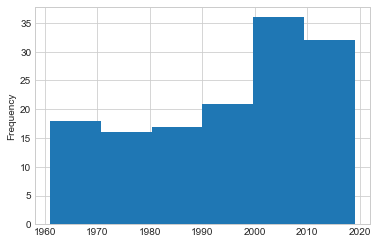

In [287]:
Hof_full.plot.hist("Year", bins=6, legend=False)

In [288]:
Hof_full['Year'] = pd.to_datetime(Hof_full['Year'])

hof_2001 = Hof_full[Hof_full['Year'].dt.year == 20015]
exclude = Hof_full[Hof_full['Year'].dt.year != 2001]

In [289]:
hof_2001

,Artist,Year
